In [106]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [107]:
m1 = np.random.randint(101)
m2 = np.random.randint(101)
s = 5
test = np.random.normal(m1,s,100)
test2 = np.random.normal(m2,s,100)

m1 = np.random.randint(101)
m2 = np.random.randint(101)
test3 = np.random.normal(m1,s,100)
test4 = np.random.normal(m2,s,100)


total1 = np.concatenate((test, test3), axis=0)
total2 = np.concatenate((test2, test4), axis=0)

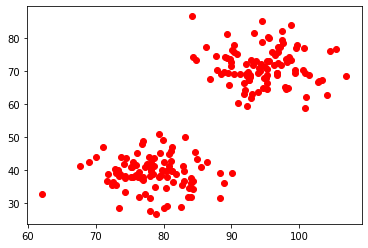

In [108]:
plt.plot(total1,total2,'ro')
plt.show()

# Creating Data

In [203]:
def create_data(m_random_low,m_random_high,s,csize,size):
    mean_x1 = {}
    mean_x2 = {}
    m1 = random.randint(m_random_low,m_random_high)
    m2 = random.randint(m_random_low,m_random_high)
    mean_x1[0] = m1
    mean_x2[0] = m2
    total1 = np.random.normal(m1,s,size)
    total2 = np.random.normal(m2,s,size)
    for i in range(1,csize):
        m1 = random.randint(m_random_low,m_random_high)
        m2 = random.randint(m_random_low,m_random_high)
        mean_x1[i] = m1
        mean_x2[i] = m2
        test1 = np.random.normal(m1,s,size)
        test2 = np.random.normal(m2,s,size)
        

        total1 = np.concatenate((total1, test1), axis=0)
        total2 = np.concatenate((total2, test2), axis=0)
    return total1,total2, mean_x1, mean_x2

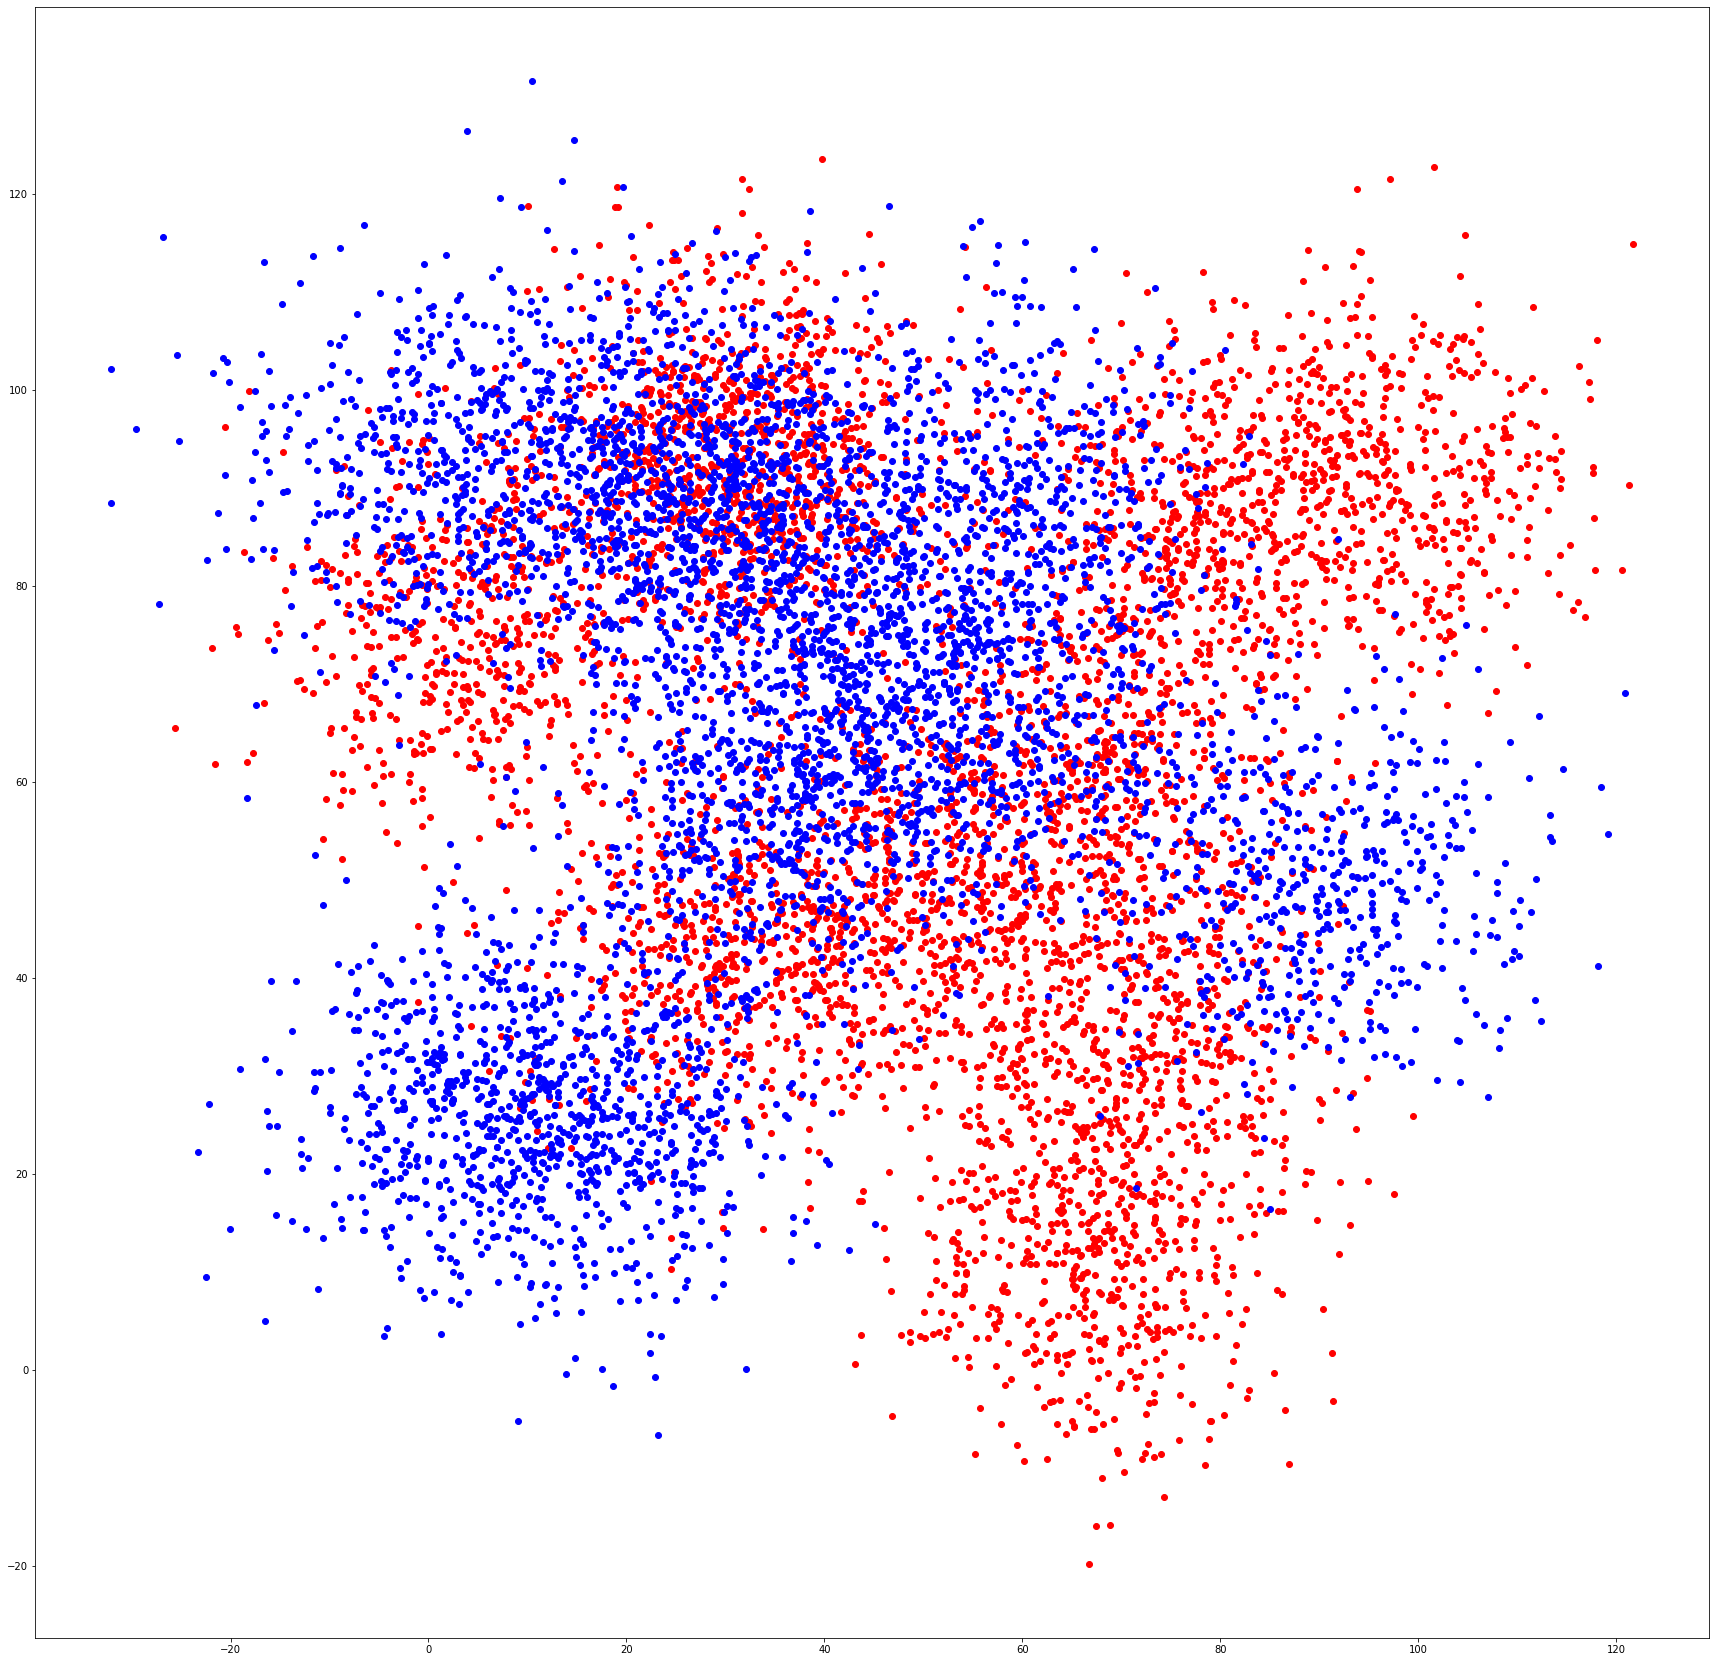

In [204]:
x1, x2, mean_0_x1, mean_0_x2 = create_data(0,100,10,10,510)
y1, y2, mean_1_x1, mean_1_x2 = create_data(0,100,10,10,510)
fig, axes = plt.subplots(1, 1)
plt.plot(x1,x2,'ro')
plt.plot(y1,y2,'bo')
fig.set_size_inches(30, 30)
plt.savefig('fig1.jpg')
plt.show()

In [205]:
mean_0_x1

{0: 77, 1: 4, 2: 68, 3: 32, 4: 68, 5: 30, 6: 96, 7: 72, 8: 31, 9: 50}

In [206]:
x1.shape

(5100,)

In [207]:
data_X = np.zeros((10200,2))
data_y = np.zeros((10200,1))

In [208]:
data_X[0:5100,0] = x1
data_X[0:5100,1] = x2
data_X[5100:,0] = y1
data_X[5100:,1] = y2
data_y[0:5100] = 0
data_y[5100:] = 1

In [209]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=(200/10200), random_state=42)

In [210]:
X_test.shape

(200, 2)

# Linear Regression

In [211]:
regr = linear_model.LinearRegression()

In [212]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
error = 0
for i,test in  enumerate(X_test):
    predict = regr.predict([test])[0][0]
    if predict < .5:
        predict_score = 0.0
    else:
        predict_score = 1.0
    real_score = y_test[i][0]
    
    if real_score != predict_score:
        error += 1
print(error/200)

0.32


In [214]:
regr.coef_

array([[-0.00489389,  0.00063287]])

In [215]:
regr.intercept_

array([0.67532425])

In [216]:
x_plot = np.arange(start=-20, stop=120, step=.1)
y_plot = (.5 - regr.intercept_[0] - (x_plot * regr.coef_[0][0])) /  regr.coef_[0][1]

In [217]:
X_train[:,0]

array([77.28636371, 73.8812695 , 54.27617981, ..., 59.65148312,
        3.50882135, 27.31219216])

In [218]:
x1

array([71.17085131, 91.80591566, 93.62652248, ..., 43.62419032,
       45.95756022, 44.53823491])

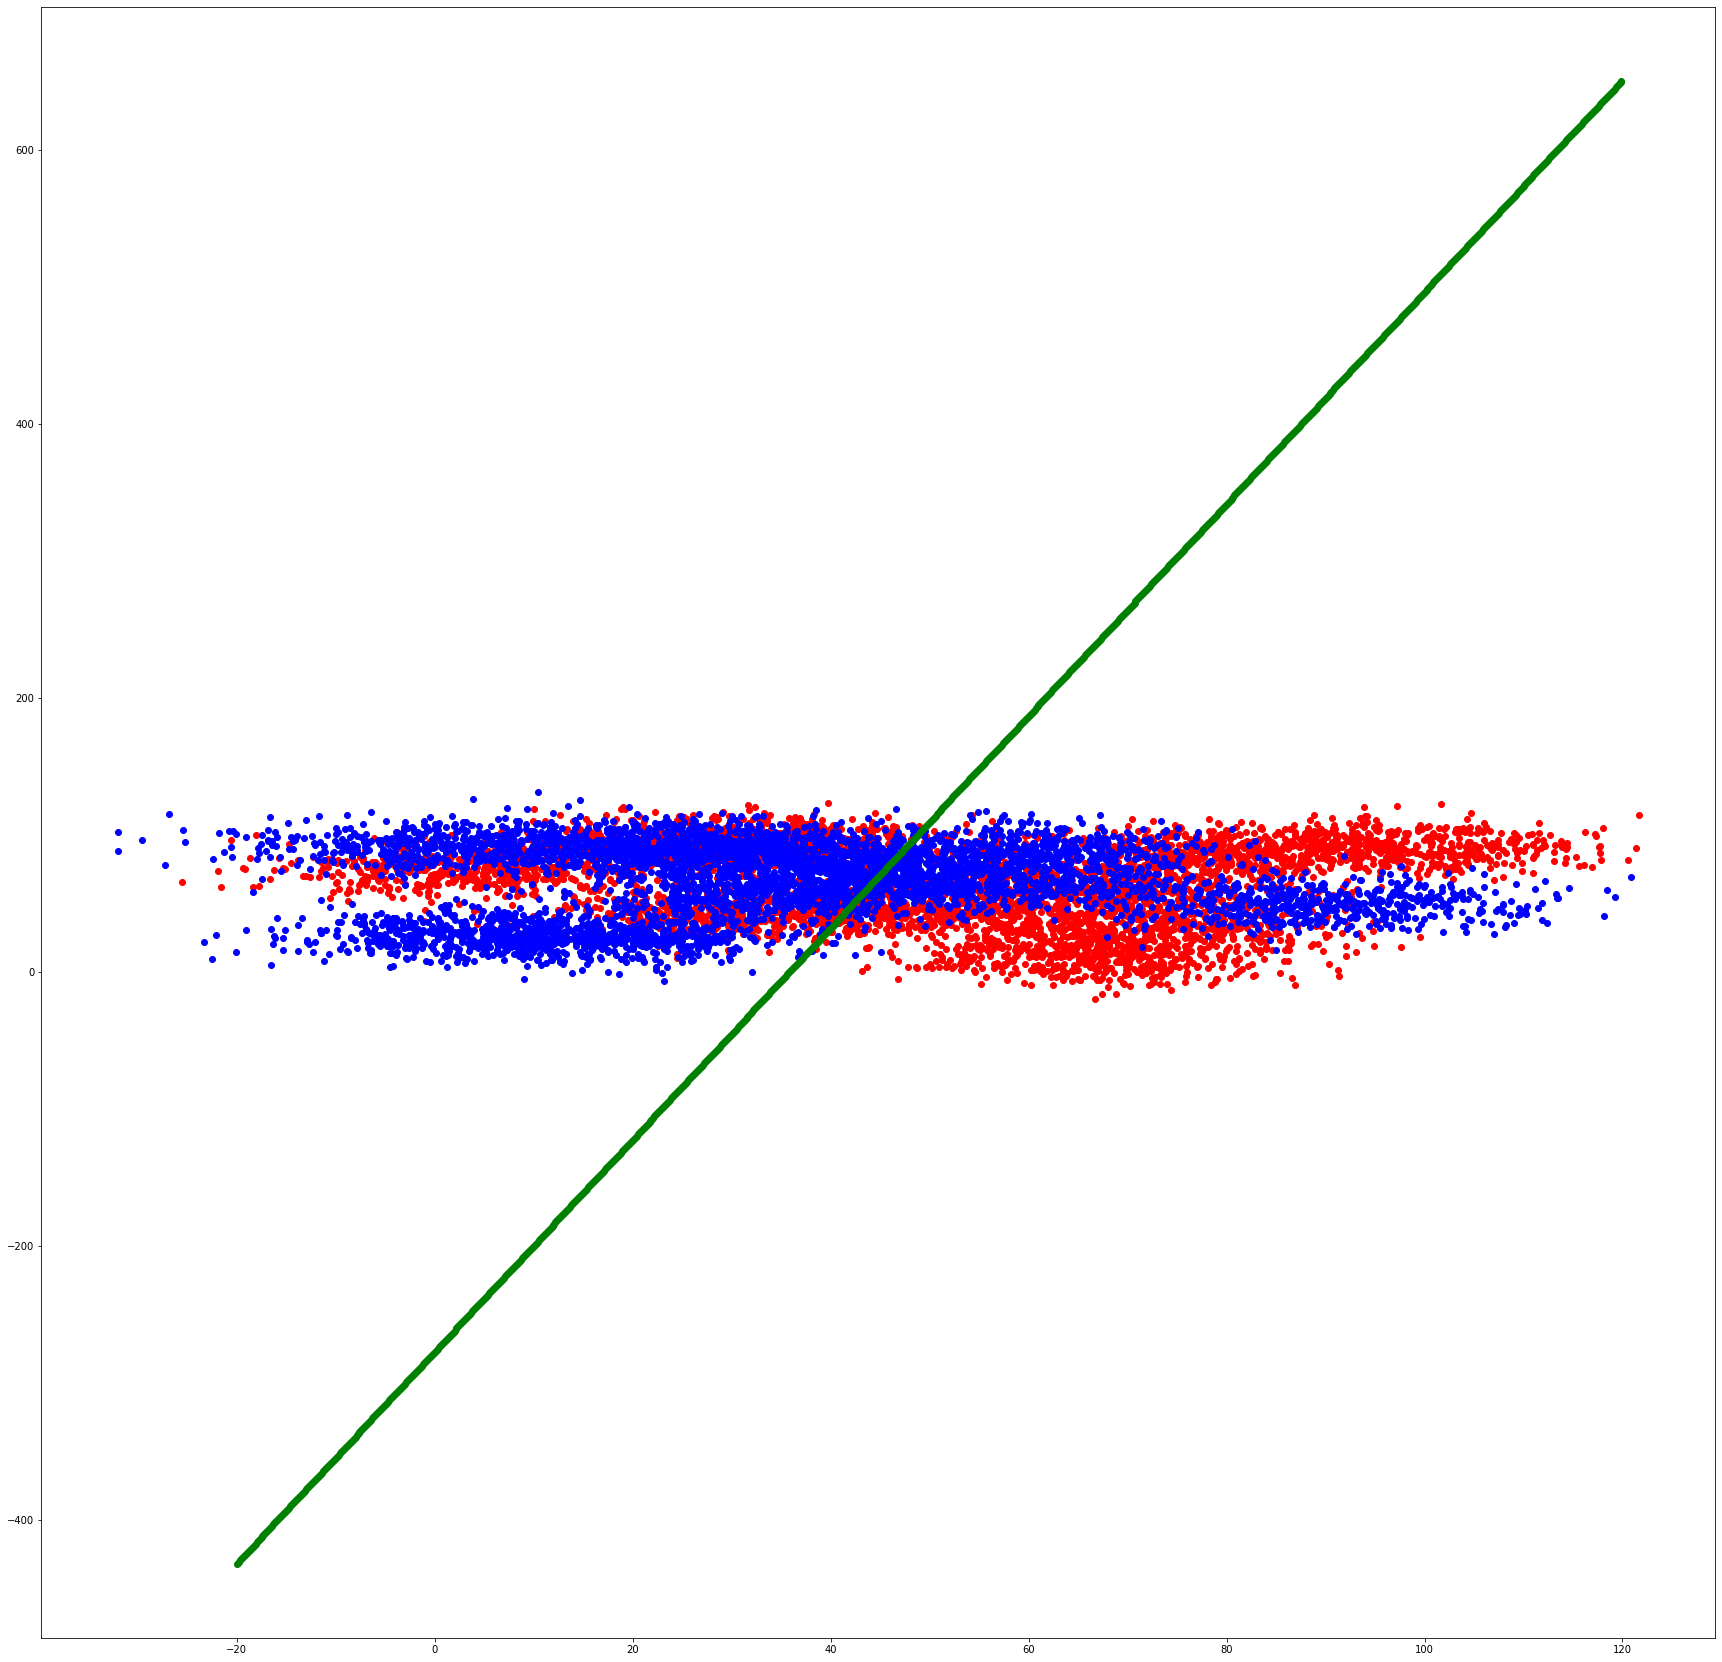

In [219]:
fig, axes = plt.subplots(1, 1)
#plt.plot(x1,x2,'ro')
#plt.plot(y1,y2,'bo')
plt.plot(x1,x2,'ro')
plt.plot(y1,y2,'bo')
plt.plot(x_plot,y_plot,'go')
fig.set_size_inches(30, 30)
plt.savefig('fig1.jpg')
plt.show()

# Quadratic Regression

In [220]:
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
X_train[0]

array([77.28636371, 82.60900247])

In [222]:
lin_reg_2.predict(poly_reg.fit_transform([X_train[0]]))

array([[0.38674415]])

In [223]:
error = 0
for i,test in  enumerate(X_test):
    predict = lin_reg_2.predict(poly_reg.fit_transform([test]))[0][0]#regr.predict([test])[0][0]
    if predict < .5:
        predict_score = 0.0
    else:
        predict_score = 1.0
    real_score = y_test[i][0]
    
    if real_score != predict_score:
        error += 1
print(error/200)

0.295


# kNN

In [233]:
data_X.shape

(10200, 2)

In [234]:
data = np.zeros(shape = (10200,3))
data[:,0:2] = data_X
data[:,2:] = data_y
data

array([[71.17085131, 72.93783181,  0.        ],
       [91.80591566, 92.16788656,  0.        ],
       [93.62652248, 87.52150805,  0.        ],
       ...,
       [64.02643689, 78.99265098,  1.        ],
       [53.43381176, 87.84782429,  1.        ],
       [50.29494231, 92.72972864,  1.        ]])

In [235]:
np.random.shuffle(data)
data

array([[15.59565804, 28.4426658 ,  1.        ],
       [54.06721337, 41.14856797,  0.        ],
       [87.74582297, 54.98412673,  1.        ],
       ...,
       [58.52621189, 57.68460326,  0.        ],
       [95.06242408, 96.22041537,  0.        ],
       [-3.56528217, 97.33233846,  1.        ]])

In [236]:
#cv 10 function
num = int(10200/10)
k_dict = {}
for k in range(1,10):
    total_score = 0
    for i in range(1,11):
        X_test = np.zeros(shape = (num,2))
        y_test = np.zeros(shape = (num,1))
        X_train = np.zeros(shape = (num * 9,2))
        y_train = np.zeros(shape = (num * 9,1))
        if i == 1:
            X_test = data[0:num,0:2]
            y_test = data[0:num,2:]
            X_train = data[num:,0:2]
            y_train = data[num:,2:]
            neigh = KNeighborsClassifier(n_neighbors= k)
            neigh.fit(X_train, y_train)
            score = neigh.score(X_test, y_test, sample_weight=None)
            total_score += score
            #print(score)

        else:
            X_test = data[num * (i-1):num * i,0:2]
            y_test = data[num * (i-1):num * i,2:]
            X_train[:num * (i-1), 0:2] = data[:num * (i-1), 0:2]
            X_train[num * (i-1):, 0:2] = data[num * i:, 0:2]
            y_train[:num * (i-1),:] = data[:num * (i-1), 2:]
            y_train[num * (i-1):,:] = data[num * i:, 2:]
            neigh = KNeighborsClassifier(n_neighbors= k)
            neigh.fit(X_train, y_train)
            score = neigh.score(X_test, y_test, sample_weight=None)
            total_score += score
            #print(score)
    k_dict[k] = 1- (total_score/10)
    

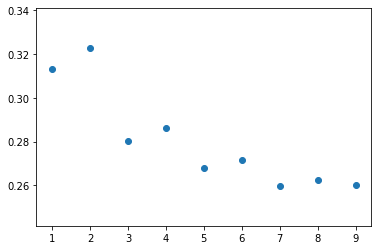

In [237]:
x = k_dict.keys()
y = k_dict.values()
plt.scatter(x,y)
plt.show()

# Bayes Error

In [224]:
mean_0_x1
mean_0_x2
mean_1_x1
mean_1_x2
X_test
y_test

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [225]:
mean_0_x1

{0: 77, 1: 4, 2: 68, 3: 32, 4: 68, 5: 30, 6: 96, 7: 72, 8: 31, 9: 50}

In [226]:
mean_0_x2

{0: 86, 1: 74, 2: 61, 3: 91, 4: 11, 5: 94, 6: 92, 7: 34, 8: 42, 9: 48}

In [227]:
mean_1_x1

{0: 56, 1: 90, 2: 35, 3: 30, 4: 23, 5: 39, 6: 5, 7: 1, 8: 18, 9: 59}

In [228]:
mean_1_x2

{0: 66, 1: 49, 2: 56, 3: 89, 4: 92, 5: 75, 6: 27, 7: 93, 8: 26, 9: 89}

In [229]:
s = 10

In [230]:
y_test.shape

(200, 1)

In [232]:
total_error = 0
for i,X_value in enumerate(X_test):
    y_value = y_test[i]
    
    num = 0
    den = 0
    for l in range(0,10):
        m_1 = np.zeros(shape = (1,2))
        m_1[0,0] = mean_1_x1[l]
        m_1[0,1] = mean_1_x2[l]
        
        m_2 = np.zeros(shape = (1,2))
        m_2[0,0] = mean_0_x1[l]
        m_2[0,1] = mean_0_x2[l]
        
        num += np.exp((-1/(2*s**2)  * np.linalg.norm(m_1 - X_value) )) 
        den += np.exp((-1/(2*s**2)  * np.linalg.norm(m_2 - X_value) )) 
    
    #print(num/den, y_value[0])
    if num > den:
        predict = 1.0
    else:
        predict = 0.0
        
    if y_value[0] != predict:
        total_error += 1
        
total_error/200
        

0.305

In [162]:
X_test

array([[ 15.31649761,  85.2046659 ],
       [ 29.65463609,   3.12805239],
       [ 24.91648912, 101.67496818],
       [ 62.53188173,  93.75231503],
       [ 78.31635946,  72.82443726],
       [ 99.16105651,  53.393887  ],
       [ -0.36326509,  46.92721094],
       [ 25.06499931,  63.17261496],
       [ 63.30508414,  90.06629435],
       [ 93.2244664 ,  70.52060651],
       [ 74.36618931,  80.73940845],
       [ 49.68756184,  33.85897457],
       [ 83.46435951,  26.01889677],
       [ 65.16617623,  63.31702832],
       [ 72.8494386 ,  73.52541513],
       [ 78.20795562,  93.64182312],
       [ 10.97059056,   1.07016422],
       [ 30.09145344,  23.95537384],
       [ 66.34843505,  95.29843542],
       [ 67.75749315,  92.08603473],
       [ 57.9129989 ,  80.37995887],
       [ 66.14723179,  60.17251715],
       [ 55.49813317,  86.99664949],
       [ 15.73048865,  39.26463652],
       [ 41.97647697,  73.20070295],
       [ 70.490342  ,  66.5337648 ],
       [ 62.03818668,  54.43385932],
 